In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

620

In [6]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
#Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    ### Code Breakdown ###
    #Parse the JSON file for the current city.
    #If there is weather data for the city, the metrics are retrieved.
    #The cities list is appended with a dictionary for that city, where the key value pairs 
    # are the values from the parameters.
    #Add the try and except block.
    #Add a pass statement to handle all errors encountered and to allow the program to continue.

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | kayes
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | trelew
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | brae
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | ranghulu
Processing Record 11 of Set 1 | boa vista
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | vardo
Processing Record 14 of Set 1 | baisha
Processing Record 15 of Set 1 | sola
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | loa janan
Processing Record 18 of Set 1 | alta floresta
Processing Record 19 of Set 1 | saleaula
City not found. Skipping...
Processing Record 20 of Set 1 | biak
Processing Record 21 of Set 1 | sembe
Processing Record 22 of Set 1 | punta are

Processing Record 39 of Set 4 | yatou
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | uthal
Processing Record 42 of Set 4 | krasnovka
Processing Record 43 of Set 4 | adrar
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | maine-soroa
Processing Record 47 of Set 4 | abashiri
Processing Record 48 of Set 4 | anzio
Processing Record 49 of Set 4 | chuy
Processing Record 50 of Set 4 | calvinia
Processing Record 1 of Set 5 | aden
Processing Record 2 of Set 5 | sungaipenuh
Processing Record 3 of Set 5 | karratha
Processing Record 4 of Set 5 | freeport
Processing Record 5 of Set 5 | kalmunai
Processing Record 6 of Set 5 | berdigestyakh
Processing Record 7 of Set 5 | wajir
Processing Record 8 of Set 5 | vredendal
Processing Record 9 of Set 5 | haimen
Processing Record 10 of Set 5 | husavik
Processing Record 11 of Set 5 | arman
Processing Record 12 of Set 5 | tutoia
Processing Record 13 of Set 5 | rawannawi
C

Processing Record 32 of Set 8 | izhma
Processing Record 33 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 34 of Set 8 | miguel hidalgo
Processing Record 35 of Set 8 | innisfail
Processing Record 36 of Set 8 | clocolan
Processing Record 37 of Set 8 | harper
Processing Record 38 of Set 8 | ankazoabo
Processing Record 39 of Set 8 | coihaique
Processing Record 40 of Set 8 | kupang
Processing Record 41 of Set 8 | morant bay
Processing Record 42 of Set 8 | richards bay
Processing Record 43 of Set 8 | igarka
Processing Record 44 of Set 8 | tilichiki
Processing Record 45 of Set 8 | biltine
Processing Record 46 of Set 8 | toksovo
Processing Record 47 of Set 8 | asau
Processing Record 48 of Set 8 | gonbad-e qabus
Processing Record 49 of Set 8 | buala
Processing Record 50 of Set 8 | yar-sale
Processing Record 1 of Set 9 | ambatofinandrahana
Processing Record 2 of Set 9 | hofn
Processing Record 3 of Set 9 | nouadhibou
Processing Record 4 of Set 9 | zyryanka
Processing Record 

Processing Record 17 of Set 12 | manaus
Processing Record 18 of Set 12 | lima
Processing Record 19 of Set 12 | aklavik
Processing Record 20 of Set 12 | rioja
Processing Record 21 of Set 12 | haapu
City not found. Skipping...
Processing Record 22 of Set 12 | sambava
Processing Record 23 of Set 12 | zaria
Processing Record 24 of Set 12 | bonavista
Processing Record 25 of Set 12 | saldanha
Processing Record 26 of Set 12 | imbituba
Processing Record 27 of Set 12 | leh
Processing Record 28 of Set 12 | johi
Processing Record 29 of Set 12 | correntina
Processing Record 30 of Set 12 | hami
Processing Record 31 of Set 12 | toftir
City not found. Skipping...
Processing Record 32 of Set 12 | lavrentiya
Processing Record 33 of Set 12 | cabedelo
Processing Record 34 of Set 12 | banavar
Processing Record 35 of Set 12 | sakakah
Processing Record 36 of Set 12 | skowhegan
Processing Record 37 of Set 12 | verkhnevilyuysk
Processing Record 38 of Set 12 | teshie
Processing Record 39 of Set 12 | itarema
Pr

In [7]:
len(city_data)

564

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,77.11,76,12,3.00,US,2021-06-06 05:59:15
1,Kayes,14.0000,-11.0000,86.22,46,20,12.50,ML,2021-06-06 05:59:16
2,Bredasdorp,-34.5322,20.0403,43.92,70,4,6.24,ZA,2021-06-06 05:59:16
3,Trelew,-43.2490,-65.3051,41.25,62,1,8.50,AR,2021-06-06 05:57:23
4,Ushuaia,-54.8000,-68.3000,29.86,93,0,8.05,AR,2021-06-06 05:56:11
5,Brae,60.3964,-1.3530,46.31,77,58,6.20,GB,2021-06-06 05:59:16
6,Coquimbo,-29.9533,-71.3436,56.93,88,90,0.58,CL,2021-06-06 05:59:17
7,Port Elizabeth,-33.9180,25.5701,50.29,76,0,6.91,ZA,2021-06-06 05:59:17
8,Ranghulu,46.6500,124.8667,72.90,34,21,8.34,CN,2021-06-06 05:59:17
9,Boa Vista,2.8197,-60.6733,78.78,83,90,4.61,BR,2021-06-06 05:54:33


In [9]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-06-06 05:59:15,22.0752,-159.3190,77.11,76,12,3.00
1,Kayes,ML,2021-06-06 05:59:16,14.0000,-11.0000,86.22,46,20,12.50
2,Bredasdorp,ZA,2021-06-06 05:59:16,-34.5322,20.0403,43.92,70,4,6.24
3,Trelew,AR,2021-06-06 05:57:23,-43.2490,-65.3051,41.25,62,1,8.50
4,Ushuaia,AR,2021-06-06 05:56:11,-54.8000,-68.3000,29.86,93,0,8.05
5,Brae,GB,2021-06-06 05:59:16,60.3964,-1.3530,46.31,77,58,6.20
6,Coquimbo,CL,2021-06-06 05:59:17,-29.9533,-71.3436,56.93,88,90,0.58
7,Port Elizabeth,ZA,2021-06-06 05:59:17,-33.9180,25.5701,50.29,76,0,6.91
8,Ranghulu,CN,2021-06-06 05:59:17,46.6500,124.8667,72.90,34,21,8.34
9,Boa Vista,BR,2021-06-06 05:54:33,2.8197,-60.6733,78.78,83,90,4.61


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

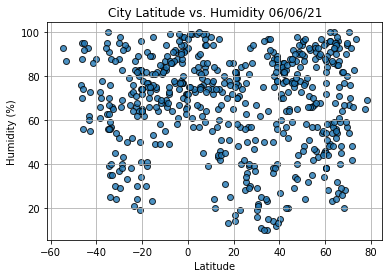

In [12]:
# Import time module
import time

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

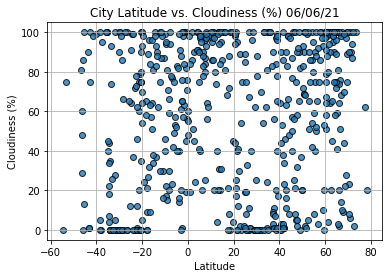

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

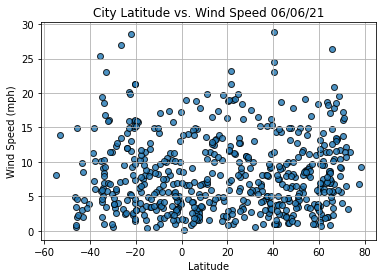

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

In [16]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-06-06 05:59:15,22.0752,-159.3190,77.11,76,12,3.00
1,Kayes,ML,2021-06-06 05:59:16,14.0000,-11.0000,86.22,46,20,12.50
5,Brae,GB,2021-06-06 05:59:16,60.3964,-1.3530,46.31,77,58,6.20
8,Ranghulu,CN,2021-06-06 05:59:17,46.6500,124.8667,72.90,34,21,8.34
9,Boa Vista,BR,2021-06-06 05:54:33,2.8197,-60.6733,78.78,83,90,4.61
...,...,...,...,...,...,...,...,...,...
554,Xam Nua,LA,2021-06-06 06:02:00,20.4197,104.0439,78.94,82,99,0.81
557,Sarangani,PH,2021-06-06 06:02:01,5.4033,125.4636,82.51,74,99,13.94
558,Northam,GB,2021-06-06 06:02:01,51.0333,-4.2167,58.19,97,100,4.97
561,Pacific Grove,US,2021-06-06 05:59:53,36.6177,-121.9166,56.88,86,83,3.00


In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-06-06 05:59:15,22.0752,-159.3190,77.11,76,12,3.00
1,Kayes,ML,2021-06-06 05:59:16,14.0000,-11.0000,86.22,46,20,12.50
5,Brae,GB,2021-06-06 05:59:16,60.3964,-1.3530,46.31,77,58,6.20
8,Ranghulu,CN,2021-06-06 05:59:17,46.6500,124.8667,72.90,34,21,8.34
9,Boa Vista,BR,2021-06-06 05:54:33,2.8197,-60.6733,78.78,83,90,4.61


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

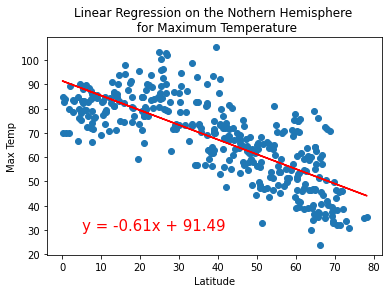

In [50]:
#Linear regression on the Northern Hemisphere (Max Temp)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere \n for Maximum Temperature', 'Max Temp', (5,30))

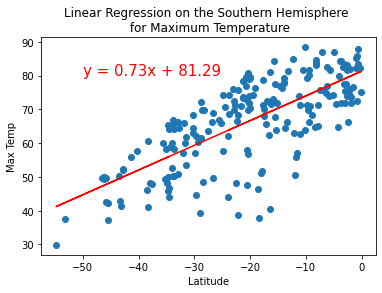

In [51]:
# Linear regression on the Southern Hemisphere with Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

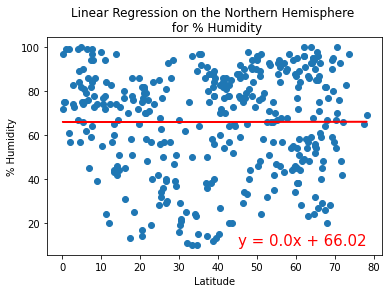

In [49]:
#Linear regression on the Northern Hemisphere (Humidity)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', (45,10))

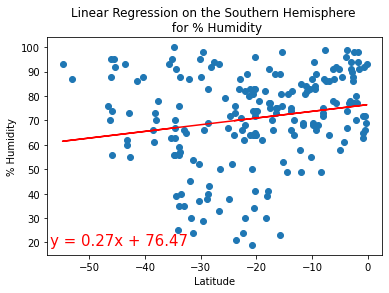

In [60]:
#Linear regression on the Southern Hemisphere (Humidity)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity', (-57,19))

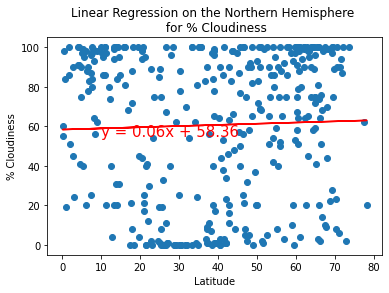

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

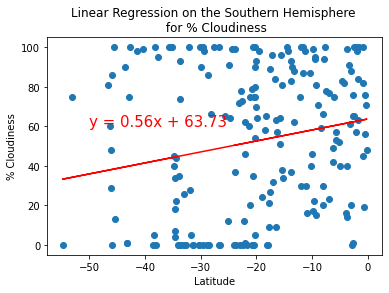

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

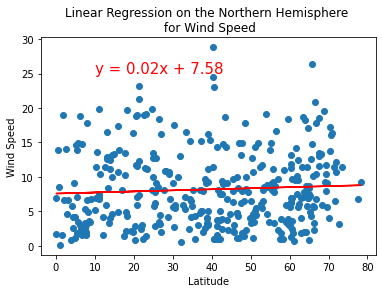

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,25))

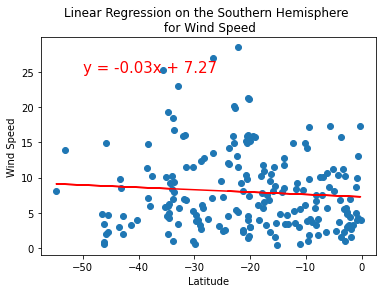

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))
